In [1]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# Load the Universities.csv dataset and check the head
crime= pd.read_csv('crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [6]:
# scale the dataset using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime = scaler.fit_transform(crime.iloc[:,1:])
scaled_crime = pd.DataFrame(scaled_crime, columns=crime.columns[1:])

In [7]:
# finding optimum number of clusters using elbow method
from sklearn.cluster import KMeans
wss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_crime)
    wss.append(kmeans.inertia_)

In [8]:
wss

[150.0,
 87.05032788335642,
 65.12102446662229,
 45.800132384027926,
 39.89187668795308,
 34.089776493279416,
 28.87972189751182,
 25.055582829469376,
 20.96695520634174,
 19.76454375219846]

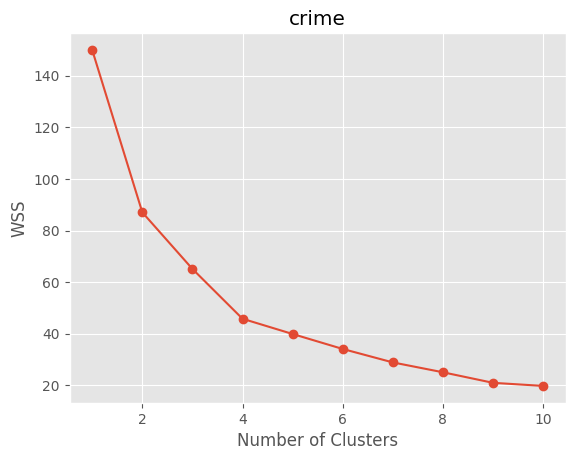

In [9]:
# plot the crime
plt.plot(range(1,11), wss, marker='o')
plt.title('crime')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS');

In [10]:
# optimum number of cluster is 2. implement a kmeans clustering modek with k =2 and get the labels
km2 = KMeans(n_clusters=4, random_state=42)
km2.fit(scaled_crime)

KMeans(n_clusters=4, random_state=42)

In [11]:
# add labels to the original dataset as a new column
labels = km2.labels_
labels

array([0, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 3, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 1, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 1, 1,
       3, 1, 1, 3, 3, 1])

In [12]:
crime['cluster_labels'] = labels
crime.head()

,Murder,Assault,UrbanPop,Rape,cluster_labels
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,2


In [13]:
# cluster profiles
crime.iloc[:,1:].groupby('cluster_labels').mean()

,Assault,UrbanPop,Rape
cluster_labels,,,
0,243.625000,53.750000,21.412500
1,138.750000,73.000000,19.280000
2,269.727273,76.181818,34.345455
3,77.000000,49.909091,11.536364


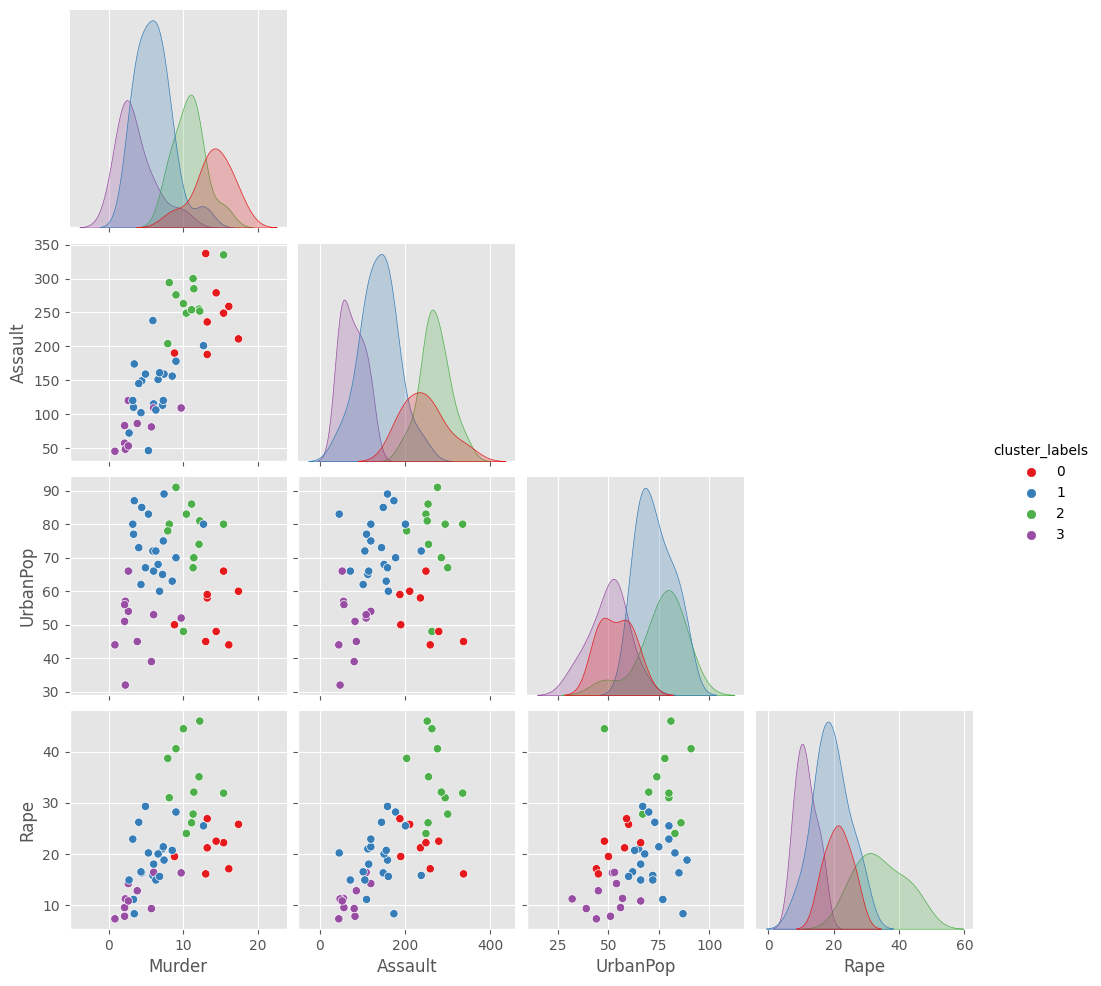

In [14]:
# plot a pairplot with cluster label as hue
sns.pairplot(crime, hue='cluster_labels', palette='Set1',corner=True);

In [15]:
# sihouette score for a set of cluster numbers
ss = []
from sklearn.metrics import silhouette_score
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(scaled_crime)
    ss.append(silhouette_score(scaled_crime, km.labels_))

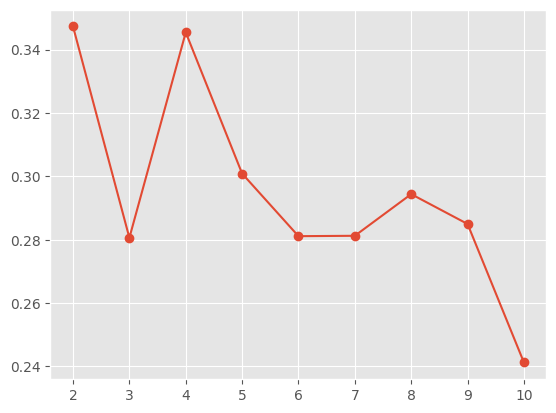

In [16]:
plt.plot(range(2,11), ss, marker='o');